In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")



from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [22]:
df = pd.read_csv("Edinburgh Listings - Outliers Removed.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,603672,https://www.airbnb.com/rooms/603672,2.020000e+13,22/10/2020,"4 Bedroom 3 Bathroom Apt, Royal Mile for 12 gu...",Modern and spacious apartment. This is a stunn...,The apartment is a great space for the Festiva...,https://a0.muscache.com/pictures/178b7b89-d900...,2711564,https://www.airbnb.com/users/show/2711564,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
1,1429868,https://www.airbnb.com/rooms/1429868,2.020000e+13,24/10/2020,"Ideal House, Leith, Edinburgh",The perfect base for a large group visiting Ed...,NaN,https://a0.muscache.com/pictures/21422395/0419...,6207176,https://www.airbnb.com/users/show/6207176,...,NaN,NaN,NaN,NaN,t,8,4,4,0,NaN
2,4467872,https://www.airbnb.com/rooms/4467872,2.020000e+13,22/10/2020,Exclusive Edinburgh Castle Duplex,Being the closest apartment in the city to the...,Ramsay Garden is just a few steps away from Ed...,https://a0.muscache.com/pictures/76252693/eef9...,2613333,https://www.airbnb.com/users/show/2613333,...,NaN,NaN,NaN,NaN,t,8,4,4,0,NaN
3,6727240,https://www.airbnb.com/rooms/6727240,2.020000e+13,22/10/2020,Fantastic Large Georgian Apartment,Fabulous large 'double upper' Georgian apartme...,Newington is a hugely popular neighbourhood to...,https://a0.muscache.com/pictures/a56c55dd-12bf...,35227313,https://www.airbnb.com/users/show/35227313,...,NaN,NaN,NaN,NaN,t,8,4,4,0,NaN
4,7905827,https://www.airbnb.com/rooms/7905827,2.020000e+13,22/10/2020,Fabulous 6 Bedroom Flat next to the Castle,"Large spacious period ""Art and Crafts"" apartme...",NaN,https://a0.muscache.com/pictures/101403921/9e1...,29997031,https://www.airbnb.com/users/show/29997031,...,NaN,NaN,NaN,NaN,t,8,4,4,0,NaN


In [3]:
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)

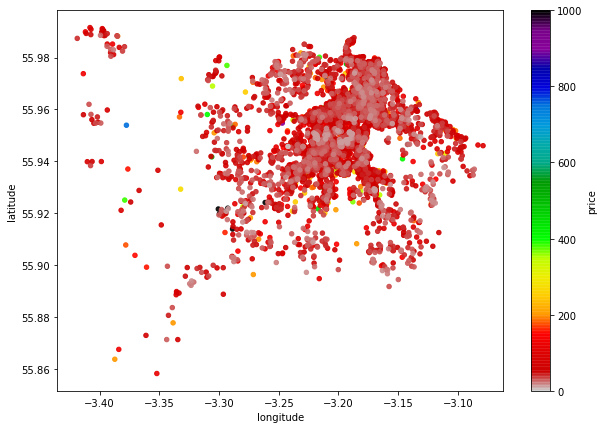

In [18]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.9, figsize=(10,7), 
        c="price", cmap="nipy_spectral_r", colorbar=True, sharex=False);

In [19]:
from collections import Counter

In [23]:
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[(' Wifi', 6117),
 (' Essentials', 6008),
 (' Smoke alarm', 5878),
 (' Hair dryer', 5598),
 (' Iron', 5548),
 (' Hangers', 5161),
 (' Carbon monoxide alarm', 5096),
 (' Washer', 4946),
 (' Heating', 4639),
 (' Shampoo', 4586),
 (' Hot water', 4515),
 (' TV', 4397),
 (' Laptop-friendly workspace', 4384),
 (' Dishes and silverware', 3848),
 (' Refrigerator', 3845),
 (' Oven', 3528),
 (' Microwave', 3430),
 (' Kitchen', 3055),
 (' Fire extinguisher', 2894),
 (' Bed linens', 2814),
 (' Cooking basics', 2788),
 (' First aid kit', 2597),
 (' Kitchen]', 2400),
 (' Free parking on premises', 2158),
 (' Coffee maker', 2023),
 (' Stove]', 1978),
 (' Dryer', 1971),
 (' Lockbox', 1959),
 (' Free street parking', 1871),
 (' Long term stays allowed', 1718)]

In [24]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

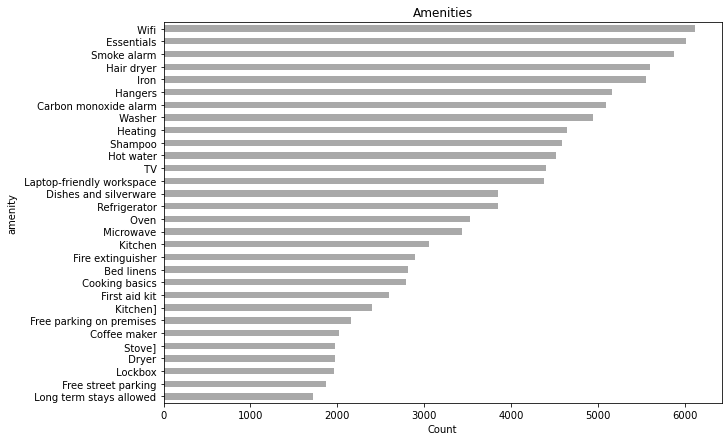

In [25]:
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

In [9]:
df['Laptop-friendly workspace'] = df['amenities'].str.contains('Laptop-friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Cooking basics'] = df['amenities'].str.contains('Cooking basics')
df['Fire extingusher'] = df['amenities'].str.contains('Fire Extingusher')
df['Refridgerator'] = df['amenities'].str.contains('Refridgerator')

In [10]:
df.drop(['amenities'], axis=1, inplace=True)

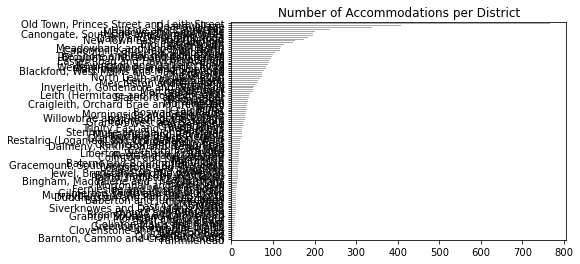

In [11]:
df['neighbourhood_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

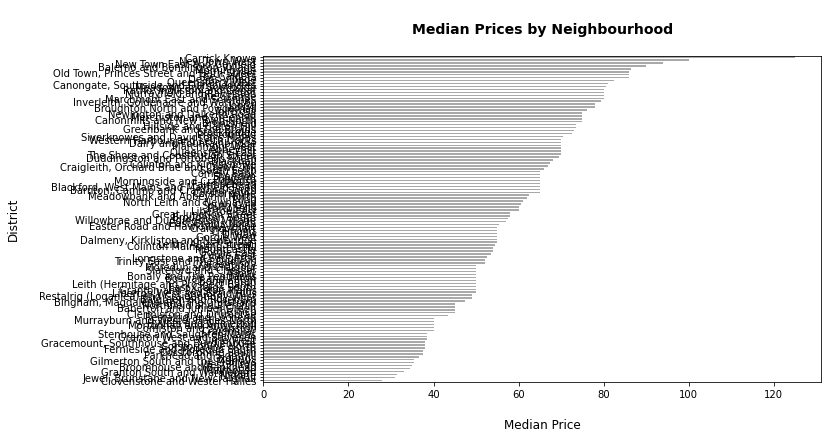

In [12]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(df.groupby(['neighbourhood_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_cleansed', y='price', 
                figsize=(10,6), legend=False, color='darkgrey')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

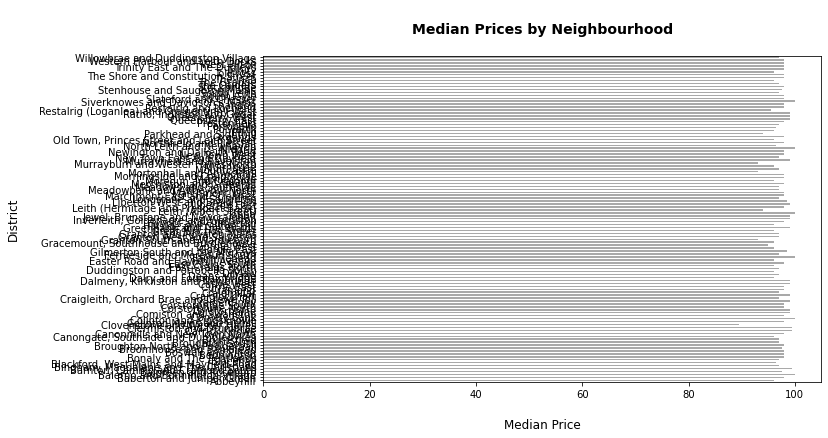

In [13]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(df.groupby(['neighbourhood_cleansed'])['review_scores_rating'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['neighbourhood_cleansed'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_cleansed', y='review_scores_rating', 
                figsize=(10,6), legend=False, color='darkgrey')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

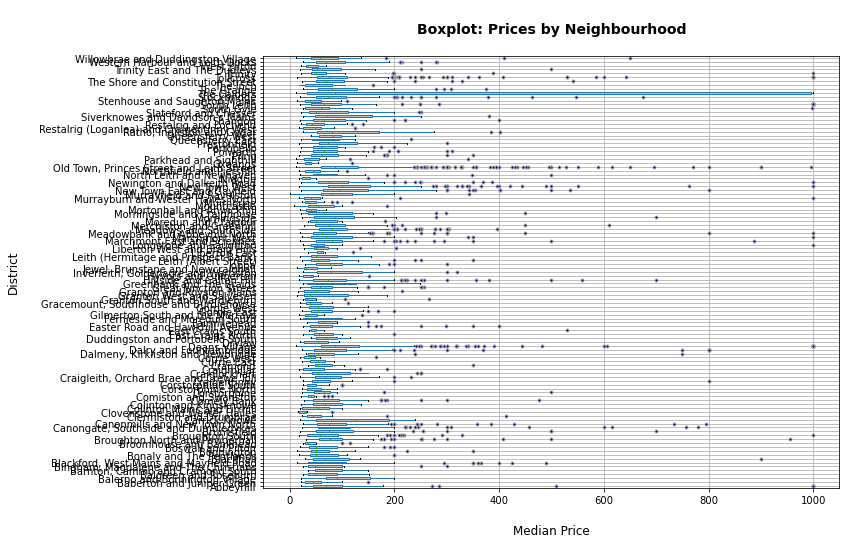

In [14]:
red_square = dict(markerfacecolor='darkblue', markeredgecolor='darkgrey', marker='.')

df.boxplot(column='price', by='neighbourhood_cleansed', 
           flierprops=red_square, vert=False, figsize=(10,8))

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nBoxplot: Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

# get rid of automatic boxplot title
plt.suptitle('');